In [5]:
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import multiprocessing

In [3]:
def run_simon(rho:float, t_steps: int = 10000):
    """
    rho:innovation rate
    t_steps: num_steps
    return : Counter(list of elements)
    """
    assert rho >= 0
    assert rho <= 1
    elements = []
    elements.append(1)
    set_of_groups = set(elements)
    for step in range(t_steps):
        if (step%1000 == 0):
            print("Step = ", step)
        dice = np.random.uniform()
        if dice < rho:
            # add a new element
            elements.append(max(set_of_groups)+1)
        else:
            # choose from population to make a choice
            elements.append(np.random.choice(list(set_of_groups)))
        set_of_groups = set(elements)
    return Counter(elements)     

In [4]:
#  rho = 0.10, 0.01, and 0.001. 
rhos = [0.10, 0.01, 0.001]
groups = { r: [] for r in rhos}
processes = []
for rho in rhos:
    # run 10 experiments
    for i in range(10):
        print("experiment = ", i)
        groups[rho].append(run_simon(rho, t_steps = 10000))

experiment =  0
Step =  0
Step =  1000
Step =  2000
Step =  3000
Step =  4000
Step =  5000
Step =  6000
Step =  7000
Step =  8000
Step =  9000
experiment =  1
Step =  0
Step =  1000
Step =  2000
Step =  3000
Step =  4000
Step =  5000
Step =  6000
Step =  7000
Step =  8000
Step =  9000
experiment =  2
Step =  0
Step =  1000
Step =  2000
Step =  3000
Step =  4000
Step =  5000
Step =  6000
Step =  7000
Step =  8000
Step =  9000
experiment =  3
Step =  0
Step =  1000
Step =  2000
Step =  3000
Step =  4000
Step =  5000
Step =  6000
Step =  7000
Step =  8000
Step =  9000
experiment =  4
Step =  0
Step =  1000
Step =  2000
Step =  3000
Step =  4000
Step =  5000
Step =  6000
Step =  7000
Step =  8000
Step =  9000
experiment =  5
Step =  0
Step =  1000
Step =  2000
Step =  3000
Step =  4000
Step =  5000
Step =  6000
Step =  7000
Step =  8000
Step =  9000
experiment =  6
Step =  0
Step =  1000
Step =  2000
Step =  3000
Step =  4000
Step =  5000
Step =  6000
Step =  7000
Step =  8000
Step =  9000

In [7]:
def compute_average_of_groups_list(groups_list):
    average_dict = {}
    for group in groups_list:
        for key in group.keys():
            if key in average_dict:
                average_dict[key] += group[key]
            else:
                average_dict[key] = group[key]
    average_dict = {k: v/len(groups_list) for k,v in average_dict.items()}
    return average_dict

In [8]:
group_averages = { rho: compute_average_of_groups_list(groups[rho]) for rho in groups.keys()}
group_averages_sorted = {rho: dict(sorted(group_averages[rho].items(), key=lambda x: x[1], reverse=True)) for rho in group_averages.keys()} 

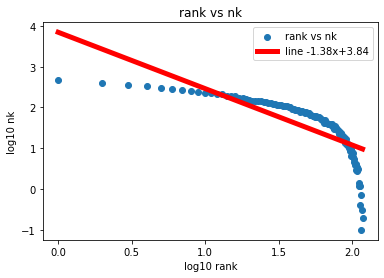

In [17]:
# # plot regression line on section1_data
group1 = group_averages[0.01]
y_data = list(group1.values())
x_data = np.arange(1, len(y_data)+1)
assert len(x_data) == len(y_data)
fig, ax = plt.subplots()
ax.scatter(np.log10(x_data), np.log10(y_data), label = "rank vs nk")
ax.set_xlabel("log10 rank")
ax.set_ylabel("log10 nk")
ax.set_title("rank vs nk")
# find line of best fit
a, b = np.polyfit(np.log10(x_data),np.log10(y_data), 1)
ax.plot(np.log10(x_data), a*np.array(np.log10(x_data))+b, color= 'r', linewidth=5.0, label = "line {}x+{}".format(round(a,2), round(b,2)))
plt.legend()
# plt.savefig("ccdf_section1_google.png")
plt.show()

In [128]:
def plot_k_nk(k, nk, plot_config:dict = None):
    fig, ax = plt.subplots()
    ax.set_xlabel("k")
    ax.set_ylabel("nk")
    ax.scatter(k, nk)
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.set_title("k vs nk")
#     plt.savefig("boys_category_"+key+"_time_series_rank.png")
#     plt.legend()
    plt.show()

# Using data for James Joyce’s Ulysses (see below), first show that Simon’s
estimate for the innovation rate ρest ≃ 0.115 is reasonably accurate for the
version of the text’s word counts given below.
Hint: You should find a slightly higher number than Simon did.
Hint: Do not compute ρest from an estimate of γ

In [48]:
 # 𝜌est = # unique words/# all words
with open("ulysses.txt", 'r') as f:
    strings = f.read().split()
strings = [s.replace(":", "") for s in strings]
ulysses = {}
for k in range(0, len(strings)-2,2):
    key = strings[k]
    value = int(strings[k+1])
    ulysses[key] = value
num_unique_words = len(list(ulysses.keys()))
num_all_words = sum(list(ulysses.values()))
rho_est = num_unique_words/num_all_words 
print("rho_est = ", rho_est)

rho_est =  0.11861128425983643


In [50]:
import math

In [55]:
# n1_g, n2_g,n3_g
def n1g(rho:float):
    return 1/(2-rho)

def n2g(rho:float):
    nr = 1 - rho
    dr = (2 - rho)*(3 - 2*rho)
    return nr/dr

def n3g(rho:float):
    nr = 2*np.power((1 - rho),2)
    dr = (2 - rho)*(3 - 2*rho)*(4 - 3*rho)
    return nr/dr

In [56]:
print(n1g(rho_est), n2g(rho_est), n3g(rho_est))

0.531522269498989 0.1695676695353615 0.08202426807395614


In [66]:
# from the ulysses
num_1_words = 0
num_2_words = 0
num_3_words = 0
for word in ulysses.keys():
    if ulysses[word] == 1:
        num_1_words +=1
    if ulysses[word] == 2:
        num_2_words +=1
    if ulysses[word] == 3:
        num_3_words +=1
n1_g_data = num_1_words/num_unique_words
n2_g_data = num_2_words/num_unique_words
n3_g_data = num_3_words/num_unique_words
print("n1_g_data = ",n1_g_data)
print("n2_g_data = ",n2_g_data)
print("n3_g_data = ",n3_g_data)

n1_g_data =  0.5649265853425487
n2_g_data =  0.15565181386756696
n3_g_data =  0.07137624613816607


# Gutenberg

In [98]:
from bs4 import BeautifulSoup
import re

def Clean_html(html_text):
    soup = BeautifulSoup(html_text, 'html.parser')
    
    for data in soup(['style', 'script']):
        # remove tags
        data.decompose()
        
    return ' '.join(soup.stripped_strings)

def Clean_text(raw_text):
    word_arr = re.split(r'\s+', raw_text) # split on whitespace
    word_arr = [word.strip(',.?!;:\"<>(){}[]+$%*#—«') for word in word_arr] # strip out weird characters
    word_arr = [word.lower() for word in word_arr]
    word_arr = list(filter(lambda w: w != '', word_arr))
    return word_arr

In [99]:
import urllib

In [151]:
pp = 'https://www.gutenberg.org/files/42671/42671-h/42671-h.htm'
mc = 'https://www.gutenberg.org/files/17989/17989-h/17989-h.htm'
mc_start = 156
mc_end = 132006
pp_start = 203
pp_end = 111956
def analysis(url = None, mc = False ):
    with urllib.request.urlopen(url) as f:
        raw_html_pp = f.read()
    raw_text = Clean_html(raw_html_pp)
    clean_text = Clean_text(raw_text)
    if mc:
        clean_text = clean_text[mc_start:mc_end]
    else:
        clean_text = clean_text[pp_start:pp_end]
    words_count = dict(Counter(clean_text))
    words_count_sorted = {k:v for k,v in sorted(words_count.items(), key = lambda k: k[1], reverse = True)}
    num_1_words = 0
    num_2_words = 0
    num_3_words = 0
    num_unique_words = len(list(words_count_sorted.keys()))
    num_all_words = sum(list(words_count_sorted.values()))
    print("num all words = ", num_all_words)
    print("num_unique_words = ", num_unique_words)
    rho_est = num_unique_words/num_all_words 
    print("rho_est = ", rho_est)
    print("n1est = ", n1g(rho_est))
    print("n2est = ", n2g(rho_est))
    print("n3est = ",n3g(rho_est))
    for word in words_count_sorted.keys():
        if words_count_sorted[word] == 1:
            num_1_words +=1
        if words_count_sorted[word] == 2:
            num_2_words +=1
        if words_count_sorted[word] == 3:
            num_3_words +=1
    print("num_1_words = ", num_1_words)
    print("num_2_words = ", num_2_words)
    print("num_3_words = ", num_3_words)
    n1_g_data = num_1_words/num_unique_words
    n2_g_data = num_2_words/num_unique_words
    n3_g_data = num_3_words/num_unique_words
    print("n1_g_data = ",n1_g_data)
    print("n2_g_data = ",n2_g_data)
    print("n3_g_data = ",n3_g_data)
    f.close()

In [152]:
print("Pride and Prejudice\n")
analysis(pp, mc = False)
print("\n")
print("Monte Cristo \n")
analysis(mc, mc = True)

Pride and Prejudice

num all words =  111753
num_unique_words =  6843
rho_est =  0.06123325548307428
n1est =  0.5157918057074812
n2est =  0.16827195795906952
n3est =  0.08278600136223944
num_1_words =  3013
num_2_words =  947
num_3_words =  592
n1_g_data =  0.44030396025135177
n2_g_data =  0.13838959520678065
n3_g_data =  0.08651176384626626


Monte Cristo 

num all words =  124471
num_unique_words =  13501
rho_est =  0.10846703248146154
n1est =  0.5286717266746234
n2est =  0.16935576961783247
n3est =  0.0821783578875855
num_1_words =  7166
num_2_words =  2015
num_3_words =  1046
n1_g_data =  0.530775498111251
n2_g_data =  0.14924820383675283
n3_g_data =  0.0774757425375898


# Excel Plot

In [117]:
# import excel
import pandas as pd
df_point_zero_zero_one = pd.read_excel (r'rho_001.xlsx')
df_point_zero_one = pd.read_excel (r'rho_01.xlsx')
df_point_one = pd.read_excel (r'rho_1.xlsx')

In [144]:
def plot_k_nk(k, nk, rho):
    fig, ax = plt.subplots()
    ax.set_xlabel("Log10 Rank")
    ax.set_ylabel("Log10 Group Size")
    ax.scatter(np.log10(k), np.log10(nk), label = "data")
    ax.set_title("Log10 Plot of Rank and Group Size, rho = "+ str(rho))
#     plt.savefig("rank_group_size_rho_"+str(rho)+".png")
    plt.legend()
    plt.show()

# Rho = 0.001

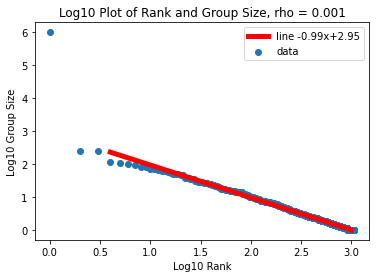

In [165]:
df_point_zero_zero_one_sorted = df_point_zero_zero_one.sort_values('Group_size', ascending = False)
group_nums = df_point_zero_zero_one_sorted.groupby('Group_num').mean()
group_nums = group_nums.sort_values('Group_size', ascending = False)
group_size = group_nums['Group_size'].tolist()
ranks = np.arange(1, len(group_size)+1)
# to plot fitted line 
rank_group_size_dict = {k:v for k,v in zip(ranks, group_size)}
section_data = { k:v for k,v in rank_group_size_dict.items() if np.log10(k) >= 0.5 and np.log10(k) < 3}
# find line of best fit
fig, ax = plt.subplots()
x_section_data = list(section_data.keys())
y_section_data = list(section_data.values())
a, b = np.polyfit(np.log10(x_section_data),np.log10(y_section_data), 1)
ax.plot(np.log10(x_section_data), a*np.array(np.log10(x_section_data))+b, color= 'r', linewidth=5.0, label = "line {}x+{}".format(round(a,2), round(b,2)))
ax.set_xlabel("Log10 Rank")
ax.set_ylabel("Log10 Group Size")
ax.scatter(np.log10(ranks), np.log10(group_size), label = "data")
ax.set_title("Log10 Plot of Rank and Group Size, rho = 0.001")
plt.savefig("rank_group_size_rho_001.png")
plt.legend()
plt.show()

# Rho = 0.01

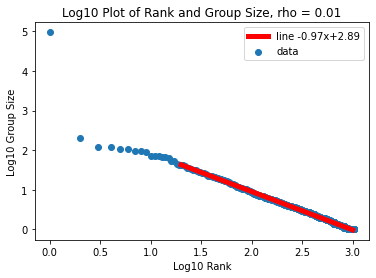

In [166]:
df_point_zero_one_sorted = df_point_zero_one.sort_values('Group_size', ascending = False)
group_nums = df_point_zero_one_sorted.groupby('Group_num').mean()
group_nums = group_nums.sort_values('Group_size', ascending = False)
group_size = group_nums['Group_size'].tolist()
ranks = np.arange(1, len(group_size)+1)
fig, ax = plt.subplots()
# to plot fitted line 
rank_group_size_dict = {k:v for k,v in zip(ranks, group_size)}
section_data = { k:v for k,v in rank_group_size_dict.items() if np.log10(k) >= 1.3 and np.log10(k) < 3}
# find line of best fit
x_section_data = list(section_data.keys())
y_section_data = list(section_data.values())
a, b = np.polyfit(np.log10(x_section_data),np.log10(y_section_data), 1)
ax.plot(np.log10(x_section_data), a*np.array(np.log10(x_section_data))+b, color= 'r', linewidth=5.0, label = "line {}x+{}".format(round(a,2), round(b,2)))
ax.set_xlabel("Log10 Rank")
ax.set_ylabel("Log10 Group Size")
ax.scatter(np.log10(ranks), np.log10(group_size), label = "data")
ax.set_title("Log10 Plot of Rank and Group Size, rho = 0.01")
plt.savefig("rank_group_size_rho_01.png")
plt.legend()
plt.show()

# Rho = 0.1

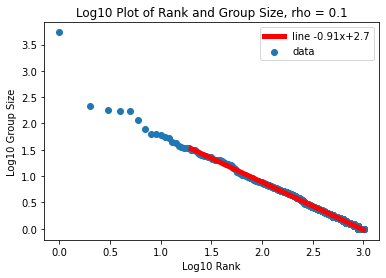

In [167]:
df_point_one_sorted = df_point_one.sort_values('Group_size', ascending = False)
group_nums = df_point_one_sorted.groupby('Group_num').mean()
group_nums = group_nums.sort_values('Group_size', ascending = False)
group_size = group_nums['Group_size'].tolist()
ranks = np.arange(1, len(group_size)+1)
# to plot fitted line 
rank_group_size_dict = {k:v for k,v in zip(ranks, group_size)}
section_data = { k:v for k,v in rank_group_size_dict.items() if np.log10(k) >= 1.3 and np.log10(k) < 3}
# find line of best fit
fig, ax = plt.subplots()
x_section_data = list(section_data.keys())
y_section_data = list(section_data.values())
a, b = np.polyfit(np.log10(x_section_data),np.log10(y_section_data), 1)
ax.plot(np.log10(x_section_data), a*np.array(np.log10(x_section_data))+b, color= 'r', linewidth=5.0, label = "line {}x+{}".format(round(a,2), round(b,2)))
ax.set_xlabel("Log10 Rank")
ax.set_ylabel("Log10 Group Size")
ax.scatter(np.log10(ranks), np.log10(group_size), label = "data")
ax.set_title("Log10 Plot of Rank and Group Size, rho = 0.1")
plt.savefig("rank_group_size_rho_1.png")
plt.legend()
plt.show()